In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1 Sampling from distributions
Generate 10000 samples by `np.random.randn`

In [3]:
# YOUR ANSWERS HERE
samples = np.random.randn(10000)

Estimate the probability density function by the samples. Hint: use ` np.histogram ` and remember the PDF should integrate to 1.

Text(0.5, 0, 'x')

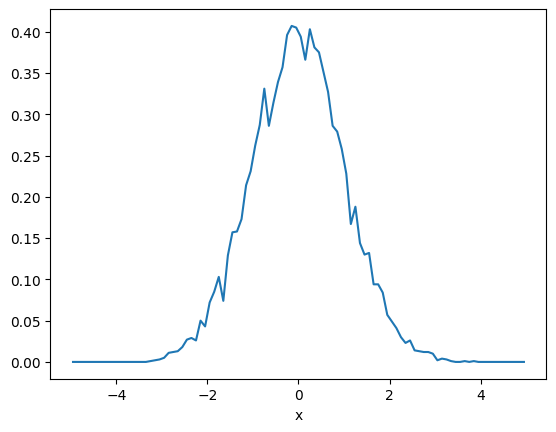

In [4]:
# YOUR ANSWERS HERE
freq,bins=np.histogram(samples,bins=100,range=[-5,5])
bin_size= bins[1]-bins[0]
pdf = freq/(np.sum(freq*bin_size))
# pdf,bins = np.histogram(samples,bins=100,density=True) #easy way
xgrid = (bins[1:]+bins[:-1])/2
plt.plot(xgrid,pdf)
plt.xlabel("x")

Compare your estimation with the ground true PDF of `np.random.randn`

Text(0.5, 0, 'x')

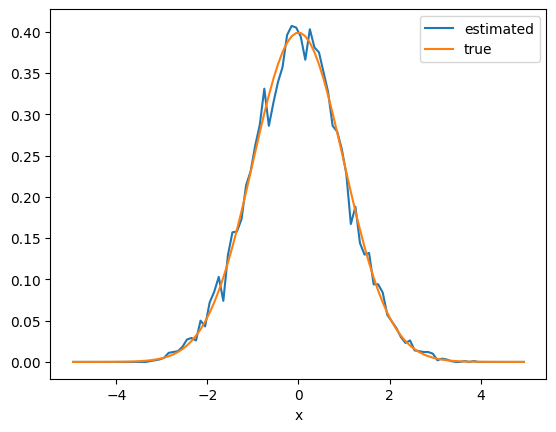

In [5]:
# YOUR ANSWERS HERE
def real_pdf(x):
    return np.exp(-x**2/2.0)/np.sqrt(2*np.pi)
plt.plot(xgrid,pdf,label="estimated")
plt.plot(xgrid,real_pdf(xgrid),label="true")
plt.legend()
plt.xlabel("x")

Show how the deviation between your estimation and ground true changes with the sample size

Text(0.5, 0, 'x')

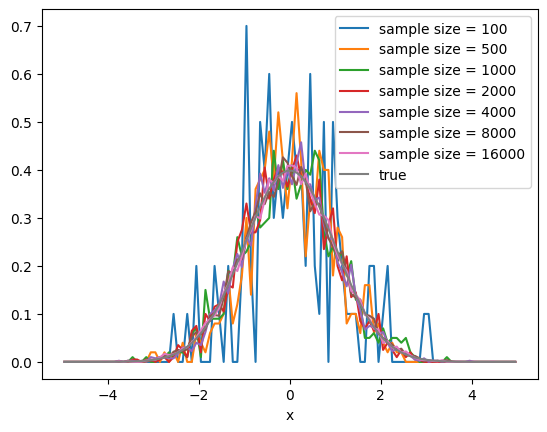

In [6]:
# YOUR ANSWERS HERE
sample_sizes = [100,500,1000,2000,4000,8000,16000]
average_l2norms = np.zeros_like(sample_sizes)
for sample_size in sample_sizes:
    samples = np.random.randn(sample_size)
    freq,bins=np.histogram(samples,bins=100,range=[-5,5])
    bin_size= bins[1]-bins[0]
    pdf = freq/(np.sum(freq*bin_size))
    plt.plot(xgrid,pdf,label="sample size = {}".format(sample_size))
plt.plot(xgrid,real_pdf(xgrid),label="true")
plt.legend()
plt.xlabel("x")

# Exercise 2 Marginal & Conditional Probability Densitites

Load the file `pmf2Dexample.mat`, which contains a discrete 2D probability mass function (PMF). The variables defined include:

$\quad$ `x` = a vector of $x$ points

$\quad$ `y` = a vector of $y$ points

$\quad$ `Pxy` = a 2D matrix, whose $i, j$ 'th entry is the probability $P(y = {\tt y[i]}, x = {\tt x[j]})$

You can visualize this density in Python via the command:
`plt.imshow`

In [7]:
# Import a file from github using 'wget'
!wget https://github.com/pillowlab/neu314data/blob/main/pmf2Dexample.mat?raw=true

# Rename raw files with the mv utility
!mv pmf2Dexample.mat\?raw\=true pmf2Dexample.mat

--2025-07-22 16:48:06--  https://github.com/pillowlab/neu314data/blob/main/pmf2Dexample.mat?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pillowlab/neu314data/raw/refs/heads/main/pmf2Dexample.mat [following]
--2025-07-22 16:48:07--  https://github.com/pillowlab/neu314data/raw/refs/heads/main/pmf2Dexample.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pillowlab/neu314data/refs/heads/main/pmf2Dexample.mat [following]
--2025-07-22 16:48:07--  https://raw.githubusercontent.com/pillowlab/neu314data/refs/heads/main/pmf2Dexample.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

if the above block doesn't work, try manually download the data file and put the data file in the same directory as this notebook

In [8]:
from scipy.io import loadmat
data = loadmat("pmf2Dexample.mat")
Pxy = data["Pxy"]
x = data["x"]
y = data["y"]

Text(0, 0.5, 'y')

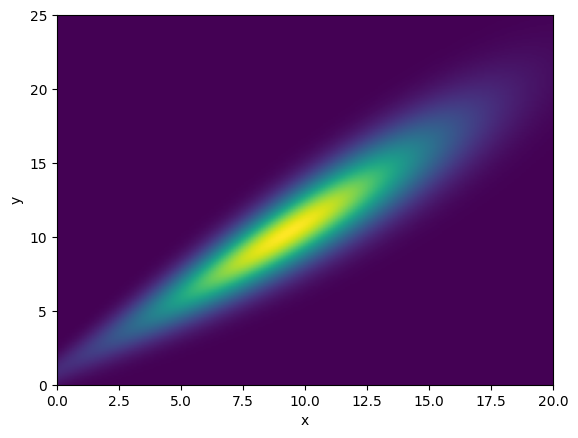

In [9]:
# Be careful about the axis!
# y is the 0th axis
# x is the 1st axis

xlim = np.array([0, 20])  # axis limits for x variable
ylim = np.array([0, 25])  # axis limits for y variable

plt.imshow(
    Pxy, aspect="auto", origin="lower", extent=[xlim[0], xlim[1], ylim[0], ylim[1]]
)
plt.xlabel("x")
plt.ylabel("y")

From this joint two-dimensional distribution, compute and make plots (or images) of the following.




$P(x)$ : The marginal probability distribution over $x$.

Text(0.5, 0, 'x')

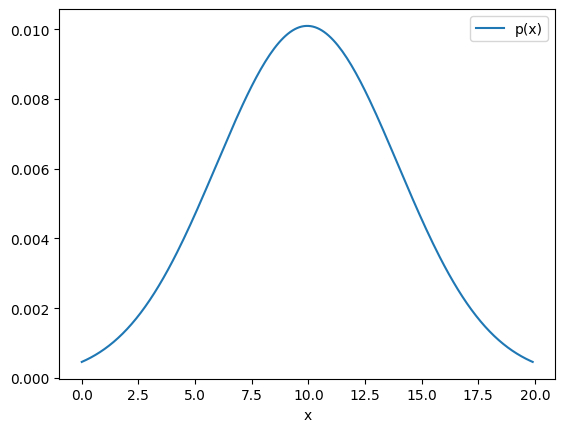

In [10]:
# YOUR ANSWERS HERE
Px = np.sum(Pxy,axis=0)
plt.plot(x,Px,label="p(x)")
plt.legend()
plt.xlabel("x")

$P(y)$ : The marginal probability distribution over $y$.

Text(0.5, 0, 'y')

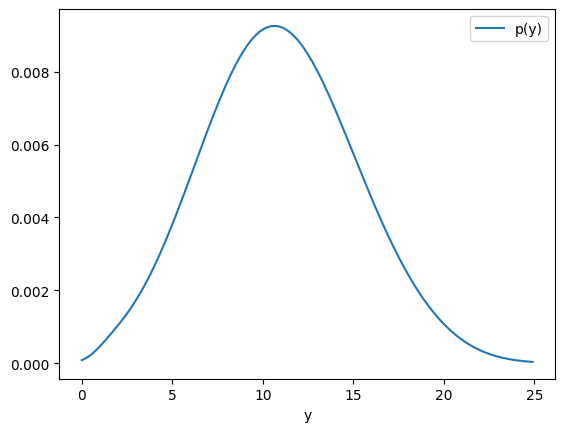

In [11]:
# YOUR ANSWERS HERE
Py = np.sum(Pxy,axis=1)
plt.plot(y,Py,label="p(y)")
plt.legend()
plt.xlabel("y")

$P(y\,|\,x=5)$ : the conditional over $y$ given $x=5$

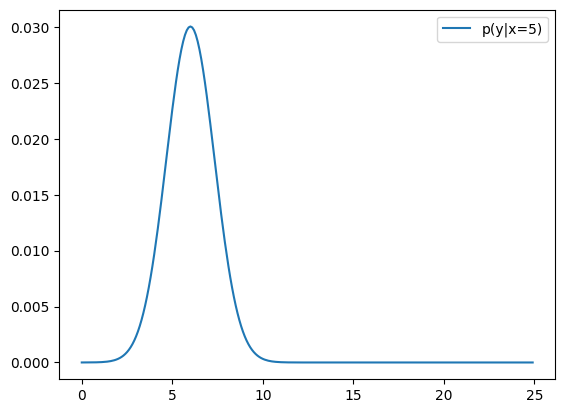

In [12]:
# YOUR ANSWERS HERE
def find_index(x_value,x):
    return np.argmin(np.abs(x-x_value))
x_condition = 5
Pycx = Pxy[:,find_index(x_condition,x)]/np.sum(Pxy[:,find_index(x_condition,x)])
plt.plot(y,Pycx,label="p(y|x=5)")
plt.legend()

 $P(x\,|\,y)$ : the full image of the conditional density $P(x\,|\,y)$

Text(0.5, 1.0, 'P(x|y)')

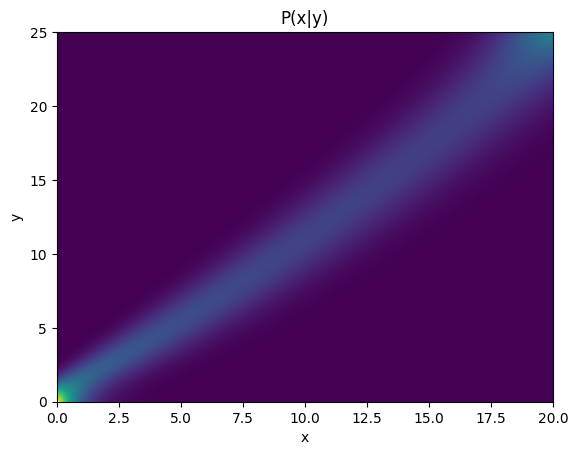

In [13]:
# YOUR ANSWERS HERE
Py_tile = np.tile(Py, (200, 1)).T
plt.imshow(Pxy/Py_tile,extent=[xlim[0], xlim[1], ylim[0], ylim[1]],aspect="auto",origin="lower")
plt.xlabel("x")
plt.ylabel("y")
plt.title("P(x|y)")

# Exercise 3 Mean, Variance, Independence

Two common statistics one might wish to compute from a distribution are its mean and variance.  

- The *mean* is the mean or average value, given by $\mathbb{E}[x] = \int x P(x) dx$ when $P(x)$ is a pdf, and $\mathbb{E}[x] = \sum_{i} x_i P(x_i)$ when $P(x)$ is a pmf.
- The *variance* is the mean value of $x$ minus its mean squared:  $\mathrm{var}(x) = \mathbb{E}[(x - \mathbb{E}[x])^2] = \sum_i (x_i - \bar x)^2 P(x_i)$


Compute the mean and variance of the marginal distribution $P(x)$.


In [14]:
# TODO: Your code here!
# Compute the mean of P(x)
mean_x = np.sum(x * Px)

# Compute the variance of P(x)
variance_x = np.sum(((x - mean_x) ** 2) * Px)

print(f"Mean of P(x): {mean_x}")
print(f"Variance of P(x): {variance_x}")

Mean of P(x): 1990.0
Variance of P(x): 784126267.0


Compute the mean and variance of the conditional distribution $P(x | y = 3)$.

In [15]:
# TODO: Your code here!
# Find the index of y closest to 3
y_target = 3
y_index = np.argmin(np.abs(y - y_target))

# Extract the conditional probability P(x | y=3)
Px_given_y3 = Pxy[y_index, :]

# Normalize to make it a proper probability distribution
Px_given_y3 /= np.sum(Px_given_y3)

# Compute the mean of P(x | y=3)
mean_x_given_y3 = np.sum(x * Px_given_y3)

# Compute the variance of P(x | y=3)
variance_x_given_y3 = np.sum(((x - mean_x_given_y3) ** 2) * Px_given_y3)

print(f"Mean of P(x | y=3): {mean_x_given_y3}")
print(f"Variance of P(x | y=3): {variance_x_given_y3}")

Mean of P(x | y=3): 1990.0000000000002
Variance of P(x | y=3): 784126267.0000001


It is clear from the image of $P(x,y)$ shown above that $x$ and $y$ are correlated, and thus $P(x,y)$ is not independent. However, we can construct an independent approximation to the distribution by taking the product of the marginals.

$$P_{indep}(x,y) = P(x) P(y)$$

Compute $P_{indep}$, defined above. Then make an image plot showing $P_{indep}$, similar to the one used to depict the original distribution.

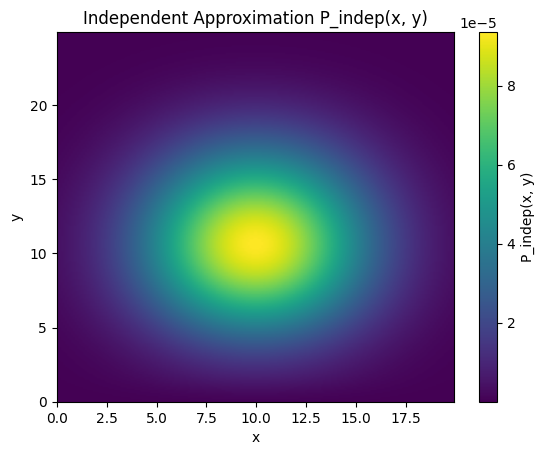

In [16]:
# TODO: Your code here!
# Compute the independent approximation P_indep(x, y) = P(x) * P(y)
P_indep = np.outer(Py, Px)  # Outer product of Py and Px

# Plot the independent approximation P_indep as an image
plt.imshow(
    P_indep, aspect="auto", origin="lower", extent=[x[0], x[-1], y[0], y[-1]]
)
plt.colorbar(label="P_indep(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Independent Approximation P_indep(x, y)")
plt.show()


Recall that an alternate definition of independence is that all conditional distributions are the same. Verify that the distribution $P_{indep}$ is indeed independent by computing and plotting two conditionals, $P_{indep}(x | y = 5)$ and $P_{indep}(x | y = 20)$ on the same set of axes, and showing that they agree.

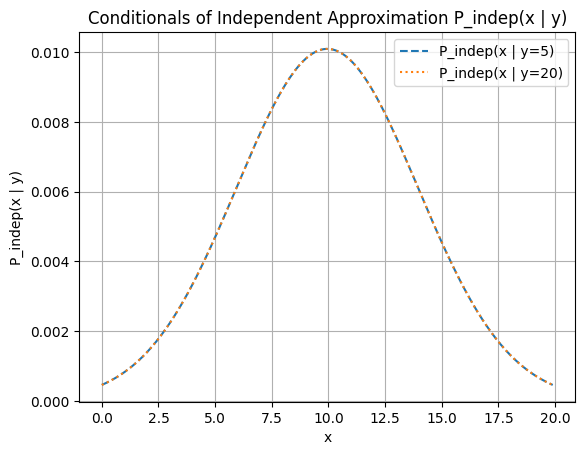

In [17]:
# TODO: Your code here!
# Compute P_indep(x | y=5)
y_index_5 = np.argmin(np.abs(y - 5))
Px_given_y5_indep = P_indep[y_index_5, :] / np.sum(P_indep[y_index_5, :])

# Compute P_indep(x | y=20)
y_index_20 = np.argmin(np.abs(y - 20))
Px_given_y20_indep = P_indep[y_index_20, :] / np.sum(P_indep[y_index_20, :])

# Plot both conditionals on the same axes
plt.plot(x, Px_given_y5_indep, label="P_indep(x | y=5)", linestyle="--" )
plt.plot(x, Px_given_y20_indep, label="P_indep(x | y=20)", linestyle=":")
plt.xlabel("x")
plt.ylabel("P_indep(x | y)")
plt.title("Conditionals of Independent Approximation P_indep(x | y)")
plt.legend()
plt.grid(True)
plt.show()

# Exercise 4 Multivariate Gaussian

Generate 10000 samples from a 2D Gaussian distribution with mean `[0,0]` and covariance `[[2,0.5],[0.5,1]]`. Hint: use `np.random.multivariate_normal`

In [7]:
# YOUR ANSWERS HERE
import numpy as np
import matplotlib.pyplot as plt
mean = np.array([0,0])
covariance = np.array([[2,0.5],[0.5,1]])
samples = np.random.multivariate_normal(mean,covariance,size=10000)

Check the covariance of the sample and compare it with ground true covariance

In [8]:
# YOUR ANSWERS HERE
sample_cov = np.cov(samples,rowvar=False)
print(sample_cov)

[[2.00826945 0.49596837]
 [0.49596837 0.99832853]]


Estimate the probability density function by the samples. Hint: use np.histogram2d and remember the PDF should integrate to 1.

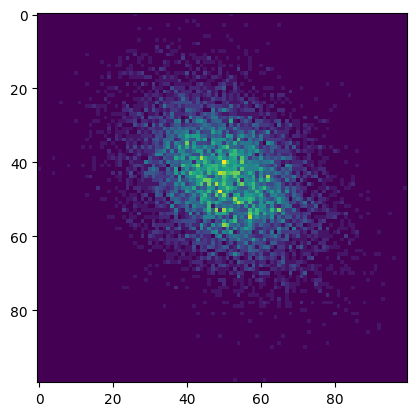

In [9]:
# YOUR ANSWERS HERE

freq,xx,yy=np.histogram2d(samples[:,0],samples[:,1],bins=100)
pdf = freq/np.sum(freq*(xx[1]-xx[0])*(yy[1]-yy[0]))
plt.imshow(pdf)


In [12]:
pdf.sum()

np.float64(116.86321168077487)

Sample several vectors with length 500 from a multivariate Gaussian with mean zero (zero vector of lenght $500$) and identity matrix (of size 500$\times$500) covariance. Plot the vectors.

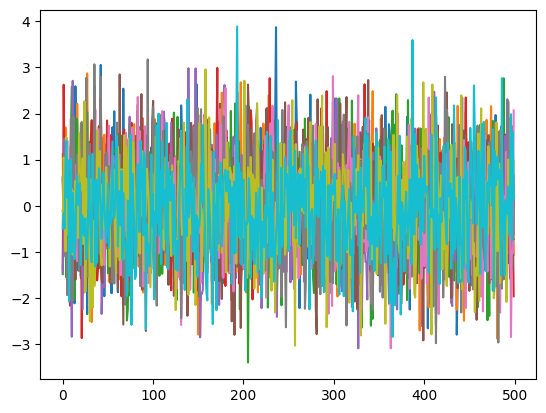

In [21]:
# YOUR ANSWERS HERE
mean = np.zeros(500)
covariance = np.eye(500)
samples = np.random.multivariate_normal(mean,covariance,size=10)
for i in range(len(samples)):
    plt.plot(samples[i])

Everything is the same as the above question, but the covariance matrix is set to be $C_{ij}=i*j$. Plot the vectors

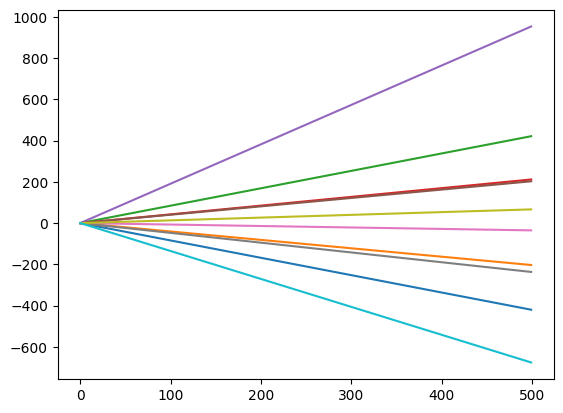

In [22]:
# YOUR ANSWERS HERE
mean = np.zeros(500)
covariance = np.arange(500).reshape(-1,1)@np.arange(500).reshape(1,-1)
samples = np.random.multivariate_normal(mean,covariance,size=10)
for i in range(len(samples)):
    plt.plot(samples[i])

Everything is the same as the above question, but the covariance matrix is set to be $C_{ij}=\exp(-0.001*(i-j)^2)$. Plot the vectors

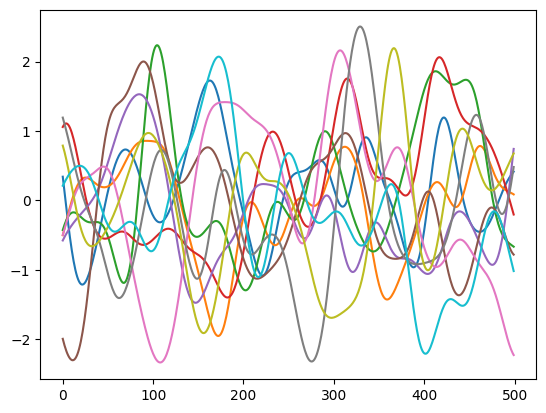

In [23]:
# YOUR ANSWERS HERE
mean = np.zeros(500)
covariance = np.exp(-0.001*(np.arange(500).reshape(-1,1)-np.arange(500).reshape(1,-1))**2)
samples = np.random.multivariate_normal(mean,covariance,size=10)
for i in range(len(samples)):
    plt.plot(samples[i])

Covariance matrix is set to be $C_{ij}=\exp(-\sin^2(0.1*|i-j|))$. Plot the vectors

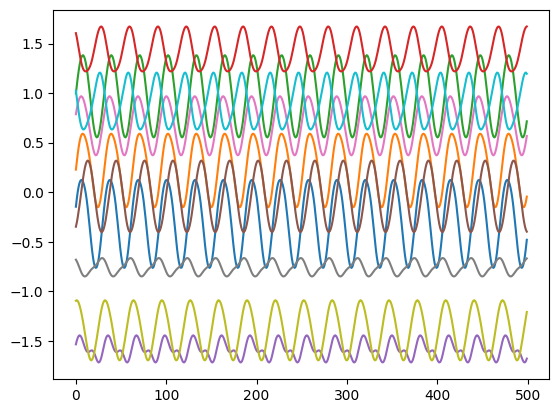

In [24]:
# YOUR ANSWERS HERE

mean = np.zeros(500)
covariance = np.exp(-0.1*(np.sin(0.1*np.abs(np.arange(500).reshape(-1,1)-np.arange(500).reshape(1,-1))))**2)
samples = np.random.multivariate_normal(mean,covariance,size=10)
for i in range(len(samples)):
    plt.plot(samples[i])

# Exercise 5 Bayes theorem

Consider a mouse in an experimental box, with two levers to choose from, one foor food, and another for water.
We want to know what the mouse's preference for water is on a particular day of the week. We will use bernoulli distribution to model the mouse's preference. Let's denote $P(water)=\theta$ and $P(food)=1-\theta$. Our goal is to inference $\theta$ based on the observed data. About the data, we will code choose for water as $1$ and food as $0$, so the data $d$ looks like $d=(0,1,0,1,1,1,1,\dots)$.

The goal is calculate
$$p(\theta | d) = \frac{P(d | \theta) P(\theta)}{\int P(d | \theta) P(\theta) \mathop{d \theta}}$$

In order to calculate the integral numerically, we are going to digitze $\theta$ into $N$ bins with width $\Delta_\theta$, then
$$
P(d)= \int P(d | \theta) P(\theta) \mathop{d \theta} \approx \sum_{j=1}^{N} P(d | \Delta_\theta*j) P(\Delta_\theta*j) \Delta_{\theta}
$$


Let's say we've observed the mouse's choices on previous days, and have counted the number of times it choose water and the number of times it choose food. With that information we assign a prior distribution to $P(\theta)$. Out of 86 choices it chose water 35 times, and food 51 times. We'll use this information to create a prior distribution for $\theta$ below



Text(0.5, 1.0, 'prior')

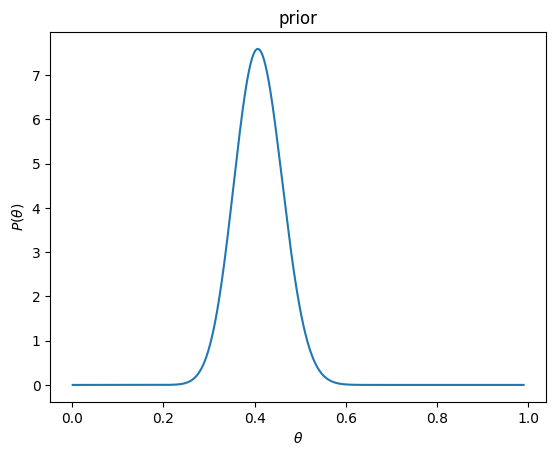

In [25]:
from scipy.stats import bernoulli,beta

true_water_pref = 0.56 # ground truth
np.random.seed(45)
data = bernoulli(p=true_water_pref).rvs(100) # generate some data from the ground truth

prior_water_choices = 35
prior_total_choices = 86
prior_food_choices = prior_total_choices - prior_water_choices
prior = lambda x: beta(prior_water_choices+1, prior_food_choices+1).pdf(x)
# Prior is a beta distribution
# Ask ChatGPT why we set our prior like this if interested

thetas = np.linspace(0.001, 0.99, 2000) #assume a discrete grid of theta for visualization
all_prior=prior(thetas)
plt.plot(thetas,all_prior)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\theta)$")
plt.title("prior")

At what value of $\theta$ is $P(\theta)$ maximized? What will happen to the prior if we double `prior_water_choices` and `prior_total_choices`?

Text(0.5, 1.0, 'prior')

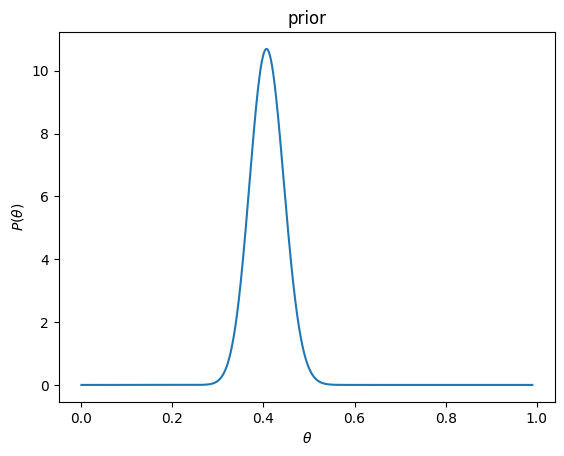

In [26]:
# YOUR ANSWERS HERE
new_prior_water_choices = 35*2
new_prior_total_choices = 86*2
new_prior_food_choices = new_prior_total_choices - new_prior_water_choices
new_prior = beta(new_prior_water_choices+1, new_prior_food_choices+1)
plt.plot(thetas,new_prior.pdf(thetas))
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\theta)$")
plt.title("prior")

**Likelihood**

When you have an array of data points as we do, how do we compute $P(d | \theta)$? The first thing to realize is that $P(d | \theta)$ is a shortened version of:

$$P(0, 1, 1, 0, 1, 1, 0, 1, 0, 1, ... | \theta)$$

additionally we make an assumption of independence and identitically distributed. This means that we are assuming each sample uses the same distributtion for it's likelihood function, and that each sample is independent of one another (obviously this latter assumption is wrong).

Now recall that if two events are independent then: $P(a, b) = P(a)P(b)$. Use this fact the likelihood can be factorized as
$$P(d | \theta) = \prod_{i=1}^{N} P(d_i|\theta) = \prod_{i=1}^{N} \theta^{d_i}(1-\theta)^{1-d_i}.$$
Write a function that takes $d$ and $\theta$ as input and $P(d|\theta)$ as output.Then plot $P(d|\theta)$ against $\theta$.

Text(0.5, 1.0, 'Likelihood')

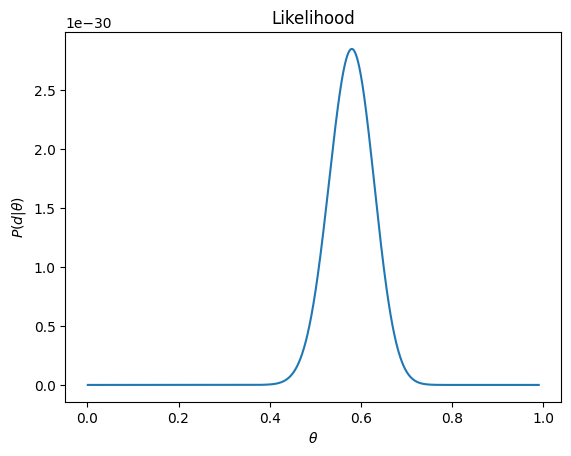

In [27]:
# YOUR ANSWERS HERE
def likelihood(d,theta):
    loglikelihood =(d*np.log(theta)+(1-d)*np.log(1.0-theta)).sum()
    return np.exp(loglikelihood)
# def likelihood(d,theta):
#     return bernoulli(p=theta).pmf(d).prod()

all_likelihood = np.array([likelihood(data,theta) for theta in thetas])
plt.plot(thetas,all_likelihood)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(d|\theta)$")
plt.title("Likelihood")

Does $P(d|\theta)$ normalized with respect to $\theta$? If not, try to normalized it. How can you interpret the meaning of normalized $P(d|\theta)$

Hint: Since
$$p(\theta | d) = \frac{P(d | \theta) P(\theta)}{\int P(d | \theta) P(\theta) \mathop{d \theta}}$$
If $P(\theta) = \mbox{constant}$ for all $\theta$, which is actually the uniform distribution, then  $P(\theta)$ can be cancelled out in the denominator and numerator, we will have
$$p(\theta | d) = \frac{P(d | \theta) }{\int P(d | \theta) \mathop{d \theta}}$$, and this is exactly the normalized likelihood. Therefore the normalized likelihood is actually the posterior with uniform prior. Alternatively, we can say that when we have uniform prior, the likelihood is actually identical to the posterior, so uniform prior is actually no prior.

Text(0.5, 1.0, 'normalized likelihood')

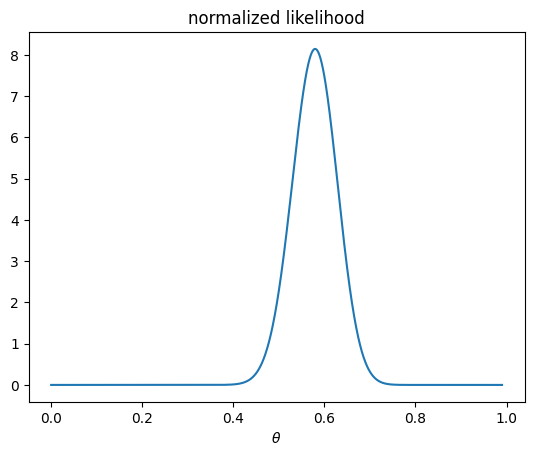

In [28]:
# YOUR ANSWERS HERE
delta_theta = thetas[1]-thetas[0]
norm = np.sum(all_likelihood*delta_theta)
normed_likelihood = all_likelihood/norm
plt.plot(thetas,normed_likelihood)
plt.xlabel(r"$\theta$")
# plt.ylabel(r"$P(d|\theta)$")
plt.title("normalized likelihood")

**Posterior**

Write a function that takes $d$ and $\theta$ as input and $P(\theta|d)$ as output.Then plot $P(\theta|d)$ against $\theta$ together with the normalized likelihood and prior.

Hint1: use the approximation $P(d)= \int P(d | \theta) P(\theta) \mathop{d \theta} \approx \sum_{j=1}^{N} P(d | \Delta_\theta*j) P(\Delta_\theta*j) \Delta_{\theta} $ to calculate the integral, where $N$ is a sufficiently large number.

Hint2: save the result of $P(d)= \int P(d | \theta) P(\theta) \mathop{d \theta}$, so that you don't need to re-calculate it when you need.

Text(0.5, 0, '$\\theta$')

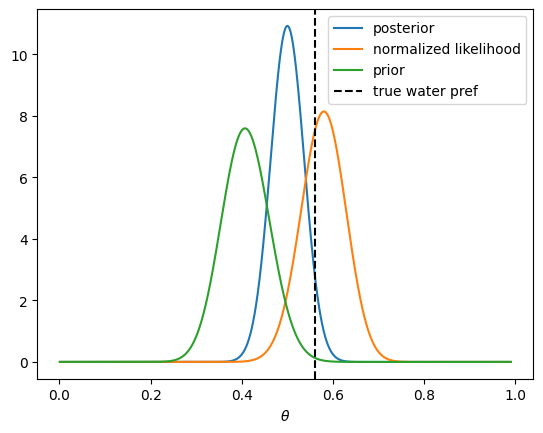

In [29]:
# YOUR ANSWERS HERE
def evidence(d,likelihood,prior,thetas=thetas):
    e = np.zeros_like(thetas)
    delta_theta = thetas[1]-thetas[0]
    for i,t in enumerate(thetas):
        e[i] = prior(t)*likelihood(d,t)*delta_theta
    return np.sum(e)

def posterior(d,theta,likelihood=likelihood,prior=prior,evidence=evidence,thetas=thetas,batch=False):
    if not batch:
        return likelihood(d,theta)*prior(theta)/evidence(d,likelihood,prior,thetas=thetas)
    else:
        ev = evidence(d,likelihood,prior,thetas=thetas)
        return np.array([likelihood(d,theta)*prior(theta)/ev for theta in thetas])


all_posterior = posterior(data,thetas,batch=True)
plt.plot(thetas,all_posterior,label="posterior")
plt.plot(thetas,normed_likelihood,label="normalized likelihood")
plt.plot(thetas,all_prior,label="prior")
plt.axvline(true_water_pref, linestyle="--", color="black", label="true water pref")
plt.legend()
plt.xlabel(r"$\theta$")

**Bayesian Update**

Now, let's explore a different approach. Suppose we want to determine the preference of a mouse after each session. We can achieve this by using the posterior from the previous session as the prior for the next session's data. Your task is to complete the "for loop" to simulate this iterative process. What happens to the posterior distribution as the iterations progress?

In order to speed up calculation, we just iterate the value on the discrete grid of $\theta$ instead of iterate the full density function.

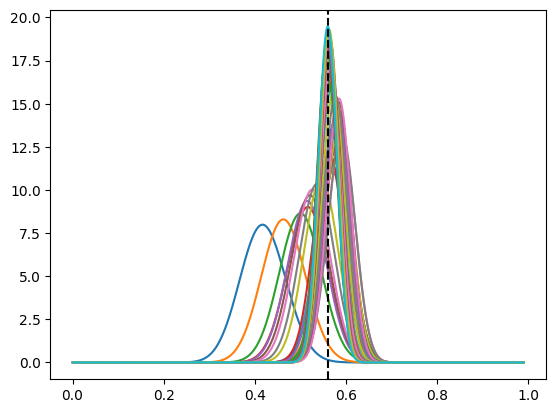

In [30]:
def get_discrete_posterior(discrete_prior,discrete_likelihood,delta_theta):
    return discrete_prior*discrete_likelihood/(np.sum(discrete_prior*discrete_likelihood*delta_theta))

delta_theta = thetas[1]-thetas[0]
total_session = 50
init_prior = prior(thetas)
for i in range(total_session):
    np.random.seed(i)
    data_i = bernoulli(p=true_water_pref).rvs(10)
    discrete_likelihood = np.array([likelihood(data_i,theta) for theta in thetas])
    if i==0:
        # YOUR ANSWERS HERE
        # use init_prior to calculate the posterior
        discrete_posterior = get_discrete_posterior(init_prior,discrete_likelihood,delta_theta)
    else:
        # YOUR ANSWERS HERE
        # use posterior from last loop as prior to calculate the new posterior
        discrete_posterior = get_discrete_posterior(discrete_posterior,discrete_likelihood,delta_theta)
    plt.plot(thetas,discrete_posterior)
plt.axvline(true_water_pref, linestyle="--", color="black", label="true water pref")

Now let's consider more complex setting. Assume the `true_water_pref` suddenly change in some session, because the mouse is hungry, see how the posterior distribution changes with the drifting.

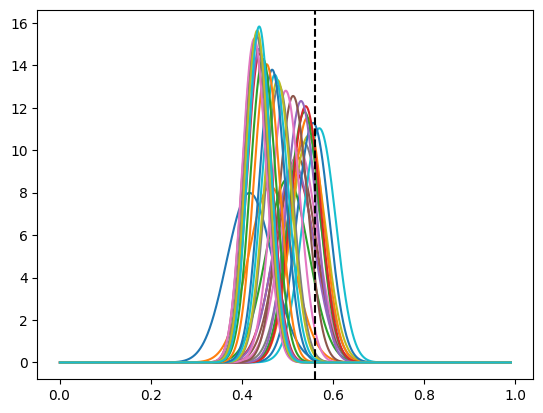

In [31]:
# YOUR ANSWERS HERE
def get_discrete_posterior(discrete_prior,discrete_likelihood,delta_theta):
    return discrete_prior*discrete_likelihood/(np.sum(discrete_prior*discrete_likelihood*delta_theta))

delta_theta = thetas[1]-thetas[0]
total_session = 30
init_prior = prior(thetas)
for i in range(total_session):
    np.random.seed(i)
    if i<10:
        data_i = bernoulli(p=true_water_pref).rvs(10)
    else:
        data_i = bernoulli(p=0.3).rvs(10) # the mouse gets hungry after session 10
    discrete_likelihood = np.array([likelihood(data_i,theta) for theta in thetas])
    if i==0:
        # YOUR ANSWERS HERE
        # use init_prior to calculate the posterior
        discrete_posterior = get_discrete_posterior(init_prior,discrete_likelihood,delta_theta)
    else:
        # YOUR ANSWERS HERE
        # use posterior from last loop as prior to calculate the new posterior
        discrete_posterior = get_discrete_posterior(discrete_posterior,discrete_likelihood,delta_theta)
    plt.plot(thetas,discrete_posterior)
plt.axvline(true_water_pref, linestyle="--", color="black", label="true water pref")


You may have noticed that in the exercise above we only numerically calculated the posterior. Actually, in our case, the posterior can be derived in closed form, because beta distribution and bernoulli distribution are conjugated with each other. In Bayesian statistics, two distributions are said to be "conjugate" if the posterior distribution resulting from a prior distribution and a likelihood function is of the same family as the prior distribution.

Detailed derivation of the conjugacy can be found https://gregorygundersen.com/blog/2020/08/19/bernoulli-beta/

We directly give the result here

---

if assume our data $$D = \{d_1, \ldots, d_N\}$$ are Bernoulli distributed with a beta prior:

$$
d \sim \text{Bern}(\theta), \quad \theta \sim \text{beta}(\alpha, \beta), \quad \theta \in [0,1].
$$


Then the posterior is proportional to a beta distribution:

$$
p(\theta \mid D) = \text{beta}(\alpha_N, \beta_N),
$$

$$
\alpha_N = \sum_{n=1}^N d_n + \alpha,
$$

$$
\beta_N = N - \sum_{n=1}^N d_n + \beta.
$$

---

Your task is to use the given math to re-implement the "for loop" above.

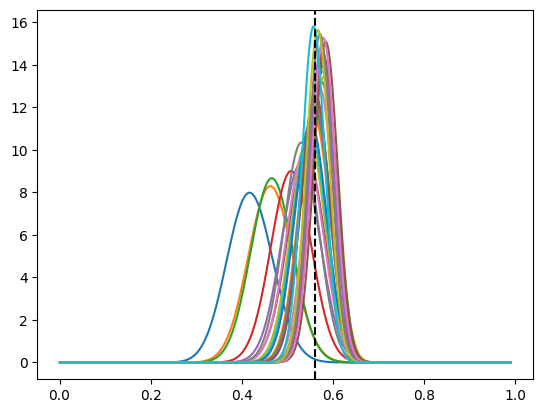

In [32]:
# YOUR ANSWERS HERE
alpha_ = prior_water_choices+1
beta_ = prior_food_choices+1
total_session = 30
for i in range(total_session):
    np.random.seed(i*i)
    data_i = bernoulli(p=true_water_pref).rvs(10)
    alpha_ = alpha_+np.sum(data_i)
    beta_ = len(data_i)-np.sum(data_i)+beta_
    pos = beta(alpha_,beta_).pdf(thetas)
    plt.plot(thetas,pos)
plt.axvline(true_water_pref, linestyle="--", color="black", label="true water pref")
